In [1]:
# just for viewing images
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Compare performance and ease of use between Tensorflow and keras

### By the end of this demo you will have:
- built 3 neural networks
- solved a multiclass classification problem
- approached state of the art performance on MNIST

# Tensorflow

If you have a tensorflow supported GPU
```
pip install tensorflow-gpu
```
If you dont (most Mac Users)
```
pip install tensorflow
```
<a href="https://www.tensorflow.org/">Tensorflow Docs</a>

Really good documentation on NN's

In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

def preview_tf_mnist(n):
    """Just to view the training data"""
    plt.imshow(mnist.train.images[n].reshape(28,28),
           cmap='gray')
    print('True Label:',np.argmax(mnist.train.labels[n]))
    plt.show()
    
def evaluate_tf_mnist(n,prediction):
    """Just to view the training data"""
    plt.imshow(mnist.test.images[n].reshape(28,28),
           cmap='gray')
    print('True Label:',np.argmax(mnist.test.labels[n]))
    print('Prediction:',prediction)
    plt.show()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


True Label: 6


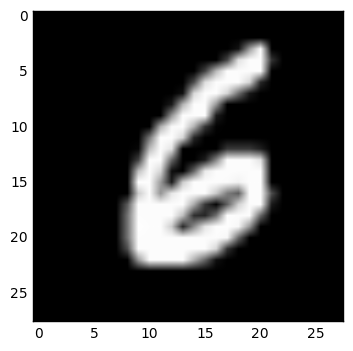

In [3]:
preview_tf_mnist(121)

### Simple no hidden layer NN

<img src="simple_nn.png" width="400px">

In [5]:
# create new tensorflow session
sess = tf.InteractiveSession()

# create placeholders for inputs and outputs
x = tf.placeholder(tf.float32, shape=[None,784])
y_ = tf.placeholder(tf.float32, shape=[None,10])

W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

# initialize variables into session
sess.run(tf.global_variables_initializer())

y = tf.matmul(x,W) + b

In [6]:
# loss function
cross_entropy = tf.reduce_mean(\
                tf.nn.softmax_cross_entropy_with_logits(y,y_)\
                              )

In [7]:
# optimizer
train_step = tf.train.GradientDescentOptimizer(0.5)\
                .minimize(cross_entropy)

In [8]:
# train the net
# 1000 training iterations
for i in range(1000):
    batch = mnist.train.next_batch(100)
    train_step.run(feed_dict={x:batch[0], y_:batch[1]})

In [9]:
# evaluate performance
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:',
      accuracy.eval(feed_dict={x: mnist.test.images,
                               y_: mnist.test.labels}))

Accuracy: 0.9184


Not too bad 92% accuracy for a 10 class classification problem in less than 15 lines of code

# keras
```
pip install keras
```
requires either tensorflow or theano installation

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [11]:
model = Sequential()
model.add(Dense(10,input_dim=784,activation='softmax'))
sgd = SGD(0.5)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 10)            7850        dense_input_1[0][0]              
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
____________________________________________________________________________________________________
None


In [12]:
model.fit(mnist.train.images,mnist.train.labels, 
          batch_size=100, nb_epoch=5, 
          validation_data=(mnist.test.images,mnist.test.labels))

Train on 55000 samples, validate on 10000 samples
Epoch 1/5
55000/55000 [==============================] - 3s - loss: 0.4038 - acc: 0.8826 - val_loss: 0.3010 - val_acc: 0.9168
Epoch 2/5
55000/55000 [==============================] - 4s - loss: 0.3109 - acc: 0.9123 - val_loss: 0.2883 - val_acc: 0.9201
Epoch 3/5
55000/55000 [==============================] - 3s - loss: 0.2963 - acc: 0.9160 - val_loss: 0.2798 - val_acc: 0.9221
Epoch 4/5
55000/55000 [==============================] - 4s - loss: 0.2874 - acc: 0.9197 - val_loss: 0.2781 - val_acc: 0.9216
Epoch 5/5
55000/55000 [==============================] - 3s - loss: 0.2814 - acc: 0.9211 - val_loss: 0.2795 - val_acc: 0.9226


In [13]:
score = model.evaluate(mnist.test.images,
                       mnist.test.labels,
                       verbose=0)
print('Accuracy:',score[1])

Accuracy: 0.9226


Same results as TensorFlow, but half the amount of code needed.

### What performance can we get using keras in 10 lines of code?

Intro convolutional Neural Nets

In [14]:
train_2d = mnist.train.images.reshape(len(mnist.train.images),28,28,1)
test_2d = mnist.test.images.reshape(len(mnist.test.images),28,28,1)

In [15]:
from keras.layers import Convolution2D, MaxPooling2D, Flatten

In [16]:
model = Sequential()
model.add(Convolution2D(32,5,5,
                        input_shape=(28,28,1),
                        activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Convolution2D(64,5,5,activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 24, 24, 32)    832         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 12, 12, 32)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 8, 8, 64)      51264       maxpooling2d_1[0][0]             
____________________________________________________________________________________________________
maxpooling2d_2 (MaxPooling2D)    (None, 4, 4, 64)      0           convolution2d_2[0][0]            
___________________________________________________________________________________________

In [17]:
model.fit(train_2d,mnist.train.labels, 
          batch_size=100, nb_epoch=5, 
          validation_data=(test_2d,mnist.test.labels))

Train on 55000 samples, validate on 10000 samples
Epoch 1/5
55000/55000 [==============================] - 16s - loss: 0.7169 - acc: 0.7592 - val_loss: 0.0884 - val_acc: 0.9726
Epoch 2/5
55000/55000 [==============================] - 16s - loss: 0.0759 - acc: 0.9759 - val_loss: 0.0643 - val_acc: 0.9786
Epoch 3/5
55000/55000 [==============================] - 15s - loss: 0.0472 - acc: 0.9848 - val_loss: 0.0493 - val_acc: 0.9845
Epoch 4/5
55000/55000 [==============================] - 12s - loss: 0.0351 - acc: 0.9885 - val_loss: 0.0440 - val_acc: 0.9854
Epoch 5/5
55000/55000 [==============================] - 11s - loss: 0.0231 - acc: 0.9928 - val_loss: 0.0475 - val_acc: 0.9863


In [18]:
score = model.evaluate(test_2d,
                       mnist.test.labels,
                       verbose=0)
print('Accuracy:',score[1])

Accuracy: 0.9863


99% accuracy in 10 lines of code on a 10 class classification problem.

Identical Tensorflow NN is about 35 lines of code.

# Takeaway

- Neural nets are an incredibly powerful ML tool
- keras provides a nice API built on top of tensorflow or theano
- building NN in keras is just as easy as scikit learn, in fact keras provides an interface with scikit learn, so you can use NNs just like any other ML algorithm.
